In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd # for read the data file
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=  pd.read_csv(r"C:\Users\RaefS\saudi-arabia-used-cars-dataset\saudi-arabia-used-cars-dataset\UsedCarsSA_Clean_EN.csv")

In [3]:
data.head() # Shows the first 5 rows of data

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


## <font color='teal'>Show the number of rows and columns</font>

In [4]:
data.shape

(8035, 13)

In [5]:
data.columns

Index(['Make', 'Type', 'Year', 'Origin', 'Color', 'Options', 'Engine_Size',
       'Fuel_Type', 'Gear_Type', 'Mileage', 'Region', 'Price', 'Negotiable'],
      dtype='object')

## <font color='lightsteelblue'> 2 Steps in Data Preprocessing </font>

In [6]:
# Check datatype for each variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [7]:
data.isnull().sum(axis = 1) # check null

0       0
1       0
2       0
3       0
4       0
       ..
8030    0
8031    0
8032    0
8033    0
8034    0
Length: 8035, dtype: int64

In [8]:
duplicateOFRow = data[data.duplicated()] # check 
print(duplicateOFRow)

        Make    Type  Year Origin  Color    Options  Engine_Size Fuel_Type  \
2027    Ford  Taurus  2015  Other    Red       Full          3.5       Gas   
3201    Ford  Taurus  2019  Other    Red  Semi Full          3.5       Gas   
5070  Toyota   Camry  2013  Saudi  White       Full          2.5       Gas   

      Gear_Type  Mileage  Region  Price  Negotiable  
2027  Automatic   122000  Dammam  69000       False  
3201  Automatic   108000  Dammam  97000       False  
5070  Automatic   185000  Riyadh      0        True  


In [9]:
data = data.drop_duplicates() # Drop it
data.shape

(8032, 13)

In [10]:
data.dtypes

Make            object
Type            object
Year             int64
Origin          object
Color           object
Options         object
Engine_Size    float64
Fuel_Type       object
Gear_Type       object
Mileage          int64
Region          object
Price            int64
Negotiable        bool
dtype: object

In [11]:
# To check rows with Price represented as'0'.
data[data.Price == 0]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
7,GMC,Yukon,2009,Saudi,Bronze,Full,5.7,Gas,Automatic,323000,Riyadh,0,True
18,GMC,Yukon,2018,Saudi,White,Full,5.3,Gas,Automatic,37000,Riyadh,0,True
26,Toyota,Camry,2019,Saudi,Red,Full,2.5,Gas,Automatic,8000,Makkah,0,True
28,Toyota,Avalon,2008,Other,Red,Full,3.5,Gas,Automatic,169000,Riyadh,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015,Saudi,Red,Standard,3.6,Gas,Automatic,195000,Al-Medina,0,True
8021,Ford,Explorer,2010,Other,Black,Semi Full,1.6,Gas,Automatic,3275230,Al-Baha,0,True
8022,Toyota,Furniture,2020,Saudi,White,Semi Full,2.7,Gas,Automatic,82000,Makkah,0,True
8024,Toyota,Furniture,2014,Saudi,White,Semi Full,4.0,Gas,Automatic,497480,Riyadh,0,True


In [12]:
# Dropping the rows having price equal to zero
data = data[data['Price'] != 0]
data.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False
5,Honda,Accord,2018,Saudi,Navy,Full,1.5,Gas,Automatic,39000,Riyadh,72000,False
6,Toyota,Land Cruiser,2011,Saudi,White,Semi Full,4.5,Gas,Automatic,183000,Riyadh,92000,False
8,Chevrolet,Impala,2019,Saudi,Black,Standard,3.6,Gas,Automatic,70000,Riyadh,80000,False
9,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,131000,Jeddah,32000,False
10,Toyota,Camry,2017,Gulf Arabic,White,Standard,2.5,Gas,Automatic,107000,Dammam,50000,False
11,Nissan,Patrol,2014,Saudi,White,Full,5.6,Gas,Automatic,106000,Dammam,135000,False


In [13]:
data.shape

(5506, 13)

In [14]:
data.sort_values(by='Price', ascending=1, inplace=True)
data.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
7233,Toyota,Yaris,2019,Saudi,White,Standard,1.6,Gas,Automatic,85000,Najran,950,False
1661,MG,5,2020,Saudi,White,Standard,1.5,Gas,Automatic,41000,Al-Ahsa,988,False
7665,Hyundai,Elantra,2019,Saudi,Grey,Standard,2.0,Gas,Automatic,89000,Jeddah,993,False
3009,GMC,Yukon,2021,Saudi,Another Color,Standard,5.3,Gas,Automatic,4000,Jeddah,1000,False
4277,Toyota,Corolla,2020,Saudi,Silver,Standard,1.6,Gas,Automatic,48563,Hail,1002,False


It is obvious that some of the values look too high to be taken into account when determining a car's pricing. I made the decision to remove the rows with prices less than 7000 Riyals in order to avoid skewing the results.


In [15]:
data[data.Price < 5000]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862,Hyundai,Accent,2008,Saudi,White,Standard,1.6,Gas,Manual,250000,Qassim,4000,False
4461,Ford,Expedition,2003,Saudi,Black,Full,5.4,Gas,Automatic,400000,Al-Jouf,4000,False
4420,Chevrolet,Suburban,1997,Other,Oily,Semi Full,6.0,Gas,Automatic,292764,Al-Medina,4000,False
5908,Chevrolet,Caprice,1995,Other,White,Full,5.5,Gas,Automatic,252,Riyadh,4500,False


In [16]:
data[data.Price < 7000]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8023,GMC,Yukon,2019,Saudi,Grey,Full,5.3,Gas,Automatic,50000,Jubail,1,False
6999,Genesis,G80,2018,Other,Grey,Semi Full,3.8,Gas,Automatic,170000,Riyadh,500,False
7625,Toyota,Yaris,2018,Saudi,White,Standard,1.5,Gas,Automatic,100000,Riyadh,850,False
2178,Mitsubishi,Attrage,2019,Saudi,Grey,Standard,1.2,Gas,Automatic,41000,Jeddah,877,False
3642,Kia,Rio,2019,Saudi,Bronze,Standard,1.4,Gas,Automatic,55500,Arar,884,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,Ford,Marquis,2001,Saudi,White,Standard,4.6,Gas,Automatic,350000,Aseer,6000,False
5850,Škoda,Fabia,2007,Saudi,Red,Standard,1.2,Gas,Manual,219000,Riyadh,6000,False
4724,Toyota,Cressida,1996,Saudi,White,Semi Full,1.5,Gas,Manual,100000,Al-Medina,6500,False
6303,Chevrolet,Suburban,1999,Saudi,Green,Standard,5.3,Gas,Automatic,2500,Hail,6500,False


In [17]:
# Dropping the rows having price equal to zero
data = data[data['Price'] > 7000]
data.head(10)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
3725,Nissan,Altima,2009,Saudi,White,Semi Full,2.5,Gas,Automatic,400000,Riyadh,7500,False
4736,Chevrolet,Optra,2009,Saudi,Silver,Semi Full,2.0,Gas,Manual,290000,Dammam,7500,False
2470,GMC,Sierra,1992,Saudi,White,Standard,3.5,Gas,Automatic,445000,Riyadh,8000,False
5341,Ford,Explorer,2003,Other,White,Standard,4.0,Gas,Automatic,360000,Khobar,8000,False
4035,Chevrolet,Blazer,2007,Saudi,Black,Semi Full,6.0,Gas,Automatic,400,Jazan,8000,False
7727,GMC,Suburban,2004,Saudi,Oily,Standard,5.3,Gas,Automatic,300000,Riyadh,8000,False
4915,Chevrolet,Aveo,2007,Saudi,Navy,Standard,1.6,Gas,Manual,280,Taef,8000,False
7134,Cadillac,DTS,2006,Saudi,Golden,Semi Full,4.8,Gas,Automatic,3000000,Al-Medina,8000,False
7965,Chevrolet,Optra,2010,Gulf Arabic,Silver,Full,1.6,Gas,Automatic,206000,Jeddah,8000,False
2613,Mercedes,E,1983,Saudi,White,Full,2.0,Gas,Automatic,500000,Riyadh,8500,False


In [18]:
data.shape

(5385, 13)

## <font color='midnightblue'> Exploratory Data Analysis (EDA)</font>

Text(0, 0.5, 'Count of Cars')

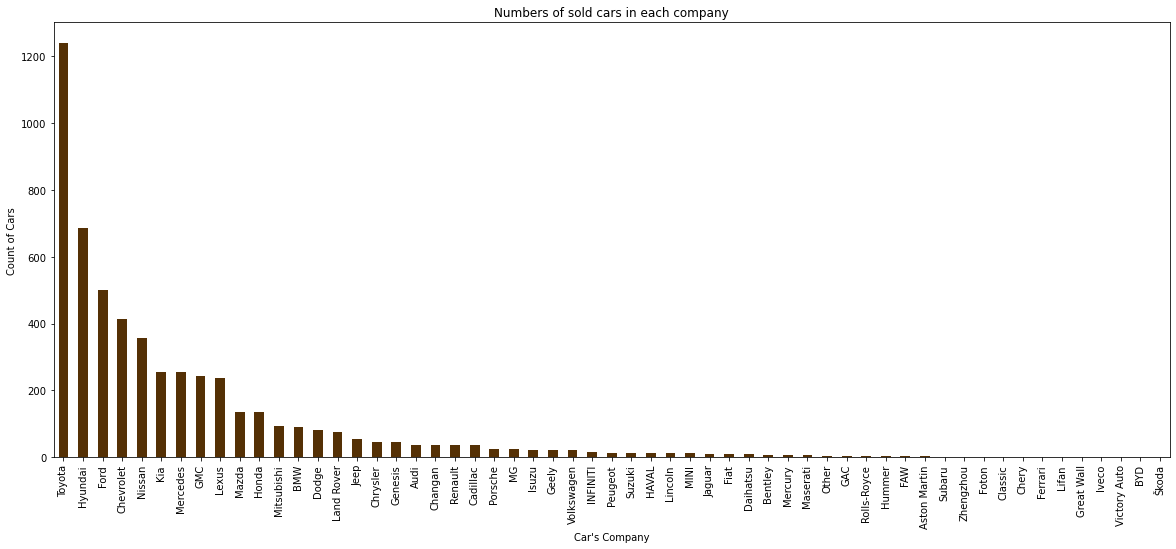

In [19]:
# Visualizing the different car company names available
plt.rcParams['figure.figsize'] = [20,8]
ax = data['Make'].value_counts().plot(kind='bar', colormap = 'BrBG')
ax.title.set_text('Numbers of sold cars in each company')
plt.xlabel("Car's Company")
plt.ylabel("Count of Cars")

**Insights:** 


Toyota, Hyundai, and Ford are among the most cars sold as used cars. On the other hand, Ferrari, Great Wall, and Victory Auto are the lowest-sold cars.

<Figure size 1440x576 with 0 Axes>

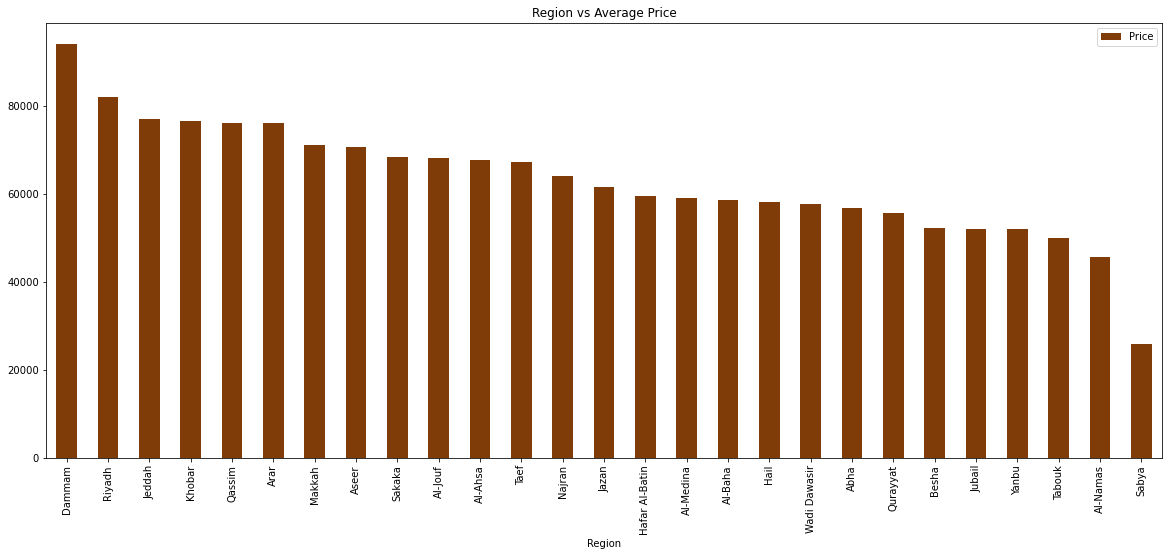

In [20]:
plt.figure(figsize=(20,8))

data = pd.DataFrame(data.groupby(['Region'])['Price'].mean().sort_values(ascending = False))
data.plot.bar(colormap = 'PuOr')
plt.title('Region vs Average Price')
plt.show()

**Insights:**


Dammam, Riyadh, and Sakaka are cities where most of the cars are sold.